# Data Illustration

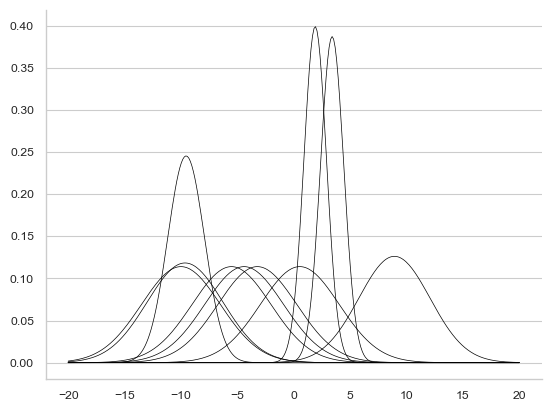

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyfrechet.metric_spaces import *
import numpy as np
from scipy import stats

np.random.seed(22)
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")
p = 10
alpha=np.random.randn()
beta=np.random.randn(p)
sig0=1
gam=2.5
for i in range(10):    
    x = np.random.randn(p)
    eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
    mu = 10*np.cos(eta*np.pi)
    sig = sig0 + gam*stats.logistic.cdf(eta)
    xs = np.linspace(-20,20,300)
    plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sig), color='black', alpha=1, linewidth=0.5)
plt.gca().spines[['right', 'top']].set_visible(False)
plt.grid(axis='x')
plt.savefig("../plots/sample_wasserstein.pdf")

# Simulation results

In [16]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import json

OUT_FILE = '../benchmark_results/20231108-result_wasserstein.json'

def load_data(path):
    with open(path, 'r') as f:
        results = json.load(f)
    df = pd.DataFrame(results)
    df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)
    
    df['err'] = df['mse']
    df['duration'] = df['total_duration']
    df['dist_duration'] = df['distances_duration']

    df['fitting_duration'] = df['duration'] - df['dist_duration']
    return df[df['N'] > 50]

df = load_data(OUT_FILE)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/zr/h_4389yx0t372wtwlt21sddw0000gn/T/ipykernel_94076/3421478614.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  forest_df = df.groupby(['N', 'p', 'method']).mean().reset_index().copy()


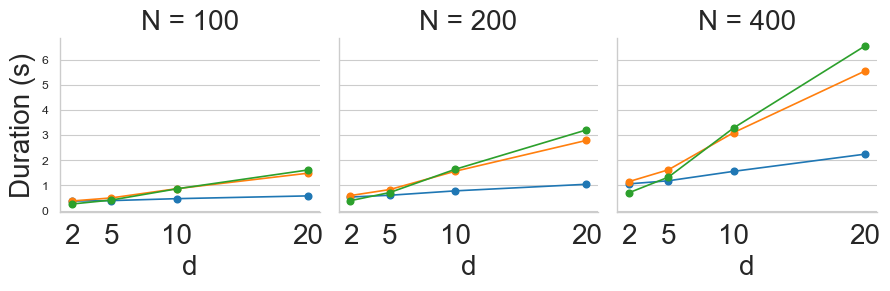

In [17]:
from plot_bench import *
sns.set_style("whitegrid")
sns.set_context("paper")
# forest_df = make_forest_df(df)
forest_df = df.groupby(['N', 'p', 'method']).mean().reset_index().copy()

has_dist = lambda method: 1.0 * (method in ['medoid_2means', 'medoid_greedy'])
O = lambda r: has_dist(r['method']) * forest_df[forest_df.N == r['N']].dist_duration.max()
forest_df['duration'] = forest_df['fitting_duration'] + forest_df[['method', 'N']].apply(O, axis=1)


grid = plot_forest_df(forest_df)
plt.savefig("../plots/runtime_wasserstein.pdf")

/Users/matthieubulte/.pyenv/versions/3.9.16/lib/python3.9/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


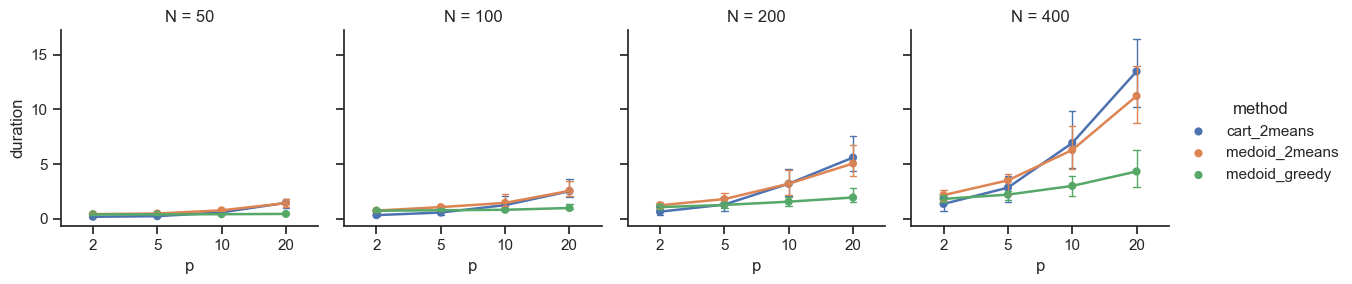

In [28]:
from plot_bench import *
import seaborn as sns
forest_df = df.copy()
has_dist = lambda method: 1.0 * (method in ['medoid_2means', 'medoid_greedy'])
O = lambda r: has_dist(r['method']) * forest_df[forest_df.N == r['N']].dist_duration.max()
forest_df['duration'] = forest_df['fitting_duration'] + forest_df[['method', 'N']].apply(O, axis=1)
sns.set(style="ticks", rc={"lines.linewidth":1})
sns.FacetGrid(forest_df,col="N",hue="method")\
    .map(sns.pointplot, 'p', 'duration', errorbar=("pi",95), capsize=0.1, errwidth=1).add_legend()

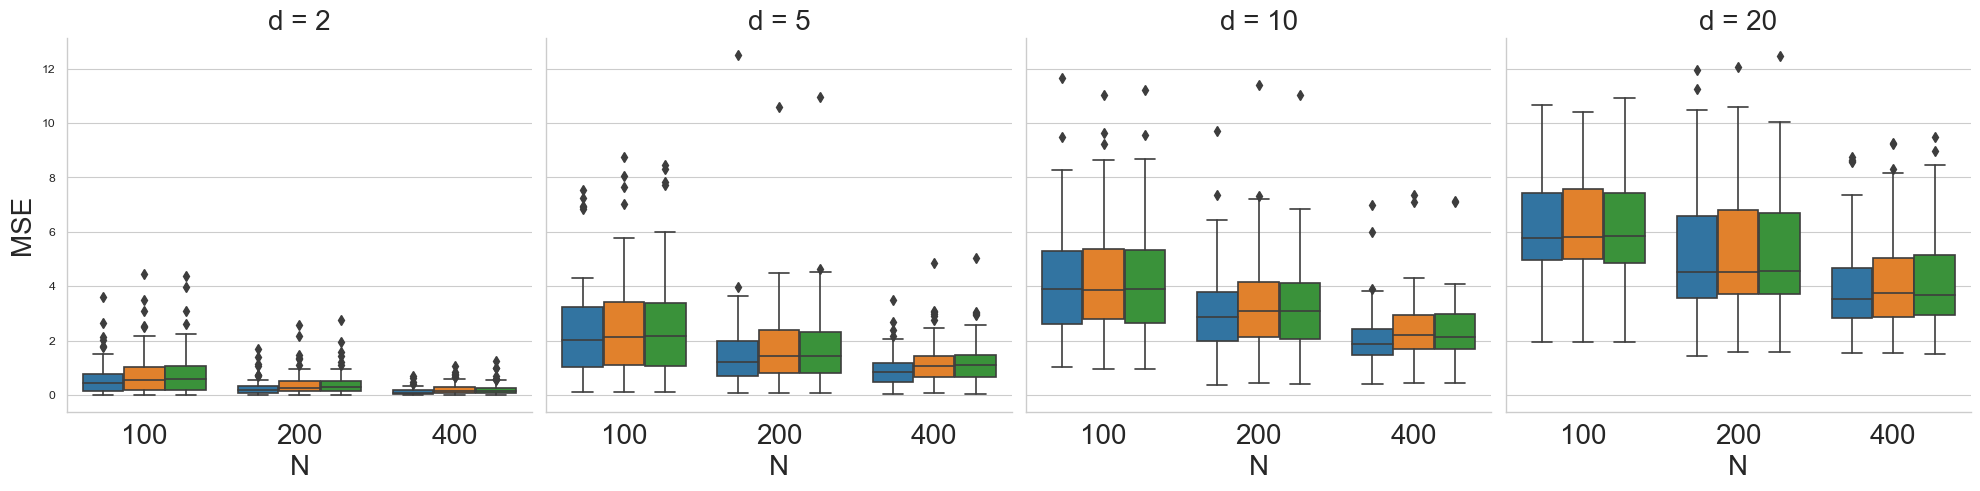

In [18]:
from plot_bench import *
plot_errors(df)
plt.savefig("../plots/error_wasserstein.pdf")